In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [38]:
rand_state = 1000

In [3]:
df=pd.read_csv('Breast Cancer.csv')

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [10]:
df.drop('id',axis=1,inplace=True)

In [11]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [12]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
x=df.drop('diagnosis',axis=1)
y=df[['diagnosis']]

In [14]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
y.head()

,diagnosis
0,M
1,M
2,M
3,M
4,M


In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
le=LabelEncoder()

In [22]:
for col in y.columns:
    y[col]=le.fit_transform(y[col])

In [23]:
y.head()

,diagnosis
0,1
1,1
2,1
3,1
4,1


In [26]:
y.diagnosis.unique()

array([1, 0], dtype=int64)

In [29]:
#M-> 1;B-> 0

In [30]:
clf=DecisionTreeClassifier()
from sklearn import tree

In [31]:
clf.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [32]:
from matplotlib import pyplot

[Text(209.25, 203.85, 'X[20] <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [357, 212]'),
 Text(136.01250000000002, 176.67000000000002, 'X[27] <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [346, 33]'),
 Text(78.46875, 149.49, 'X[10] <= 1.048\ngini = 0.03\nsamples = 333\nvalue = [328, 5]'),
 Text(68.00625000000001, 122.31, 'X[13] <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [328, 4]'),
 Text(41.85, 95.13, 'X[14] <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [317, 2]'),
 Text(20.925, 67.94999999999999, 'X[27] <= 0.101\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(10.4625, 40.77000000000001, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(31.387500000000003, 40.77000000000001, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(62.775000000000006, 67.94999999999999, 'X[21] <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [311, 1]'),
 Text(52.3125, 40.77000000000001, 'gini = 0.0\nsamples = 292\nvalue = [292, 0]'),
 Text(73.2375, 40.77000000000001, 'X[21] <= 33.56\ngini = 0.095\ns

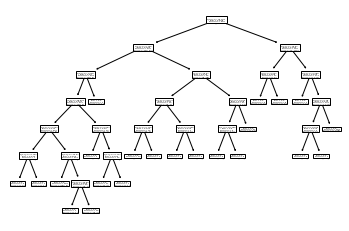

In [33]:
tree.plot_tree(clf)

[Text(418.5, 254.8125, 'radius_worst <= 16.795\ngini = 0.468\nsamples = 569\nvalue = [357, 212]'),
 Text(272.02500000000003, 220.8375, 'concave points_worst <= 0.136\ngini = 0.159\nsamples = 379\nvalue = [346, 33]'),
 Text(156.9375, 186.8625, 'radius_se <= 1.048\ngini = 0.03\nsamples = 333\nvalue = [328, 5]'),
 Text(136.01250000000002, 152.8875, 'area_se <= 38.605\ngini = 0.024\nsamples = 332\nvalue = [328, 4]'),
 Text(83.7, 118.9125, 'smoothness_se <= 0.003\ngini = 0.012\nsamples = 319\nvalue = [317, 2]'),
 Text(41.85, 84.9375, 'concave points_worst <= 0.101\ngini = 0.245\nsamples = 7\nvalue = [6, 1]'),
 Text(20.925, 50.962500000000006, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(62.775000000000006, 50.962500000000006, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(125.55000000000001, 84.9375, 'texture_worst <= 33.27\ngini = 0.006\nsamples = 312\nvalue = [311, 1]'),
 Text(104.625, 50.962500000000006, 'gini = 0.0\nsamples = 292\nvalue = [292, 0]'),
 Text(146.475, 50.9625000000

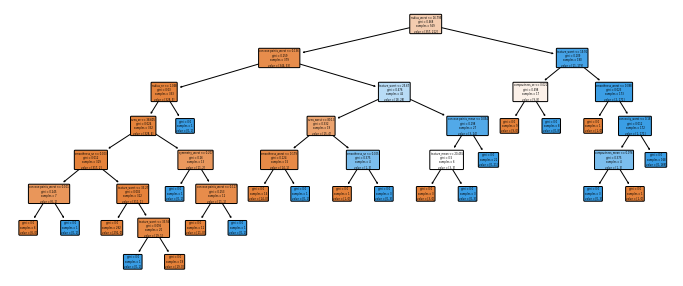

In [34]:
pyplot.figure(figsize=(12,5))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x.columns)

In [35]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [36]:
text = tree.export_text(clf)

In [37]:
print(text)

|--- feature_20 <= 16.80
|   |--- feature_27 <= 0.14
|   |   |--- feature_10 <= 1.05
|   |   |   |--- feature_13 <= 38.60
|   |   |   |   |--- feature_14 <= 0.00
|   |   |   |   |   |--- feature_27 <= 0.10
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_27 >  0.10
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_14 >  0.00
|   |   |   |   |   |--- feature_21 <= 33.27
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_21 >  33.27
|   |   |   |   |   |   |--- feature_21 <= 33.56
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_21 >  33.56
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |--- feature_13 >  38.60
|   |   |   |   |--- feature_28 <= 0.21
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_28 >  0.21
|   |   |   |   |   |--- feature_27 <= 0.12
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_27 >  0.12
|   |   |   |   |   |   |--- class: 1
|   |   |

# Defining the variables and splitting the data

In [39]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.3, random_state=rand_state)

In [40]:
xtrain.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
356,13.050,18.59,85.09,512.0,0.10820,0.13040,0.09603,0.056030,0.2035,0.06501,...,14.190,24.85,94.22,591.2,0.1343,0.26580,0.2573,0.12580,0.3113,0.08317
394,12.100,17.72,78.07,446.2,0.10290,0.09758,0.04783,0.033260,0.1937,0.06161,...,13.560,25.80,88.33,559.5,0.1432,0.17730,0.1603,0.06266,0.3049,0.07081
75,16.070,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.066380,0.1798,0.05391,...,19.770,24.56,128.80,1223.0,0.1500,0.20450,0.2829,0.15200,0.2650,0.06387
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,8.964,21.96,57.26,242.2,0.1297,0.13570,0.0688,0.02564,0.3105,0.07409
69,12.780,16.49,81.37,502.5,0.09831,0.05234,0.03653,0.028640,0.1590,0.05653,...,13.460,19.76,85.67,554.9,0.1296,0.07061,0.1039,0.05882,0.2383,0.06410


# KNN Classification with Sklearn

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [46]:
pred= knn.predict(xtest)
pred_probs = knn.predict_proba(xtest)[:,1]

In [51]:
np.round(knn.predict_proba(xtest),3)[:5]

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [52]:
np.max(pred_probs)

1.0

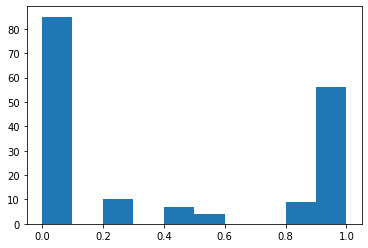

In [55]:
plt.hist(pred_probs)
plt.show()

# Confusion matrix

In [56]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [57]:
print(confusion_matrix(ytest, pred))

[[97  7]
 [ 5 62]]


Built-in classification report

In [59]:
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       104
           1       0.90      0.93      0.91        67

    accuracy                           0.93       171
   macro avg       0.92      0.93      0.93       171
weighted avg       0.93      0.93      0.93       171

